# Progetto di Laboratorio di Big Data, Data Mining e Data Analytics

Import delle librerie necessarie

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import FixedLocator



# Caricamento del dataset

Questo set di dati esplora il fenomeno della disparità dell'aspettativa di vita tra i sessi in vari paesi che vanno dal 1950 al 2021. Approfondendo l'antica affermazione secondo cui "le donne vivono più a lungo degli uomini", questo set di dati fornisce approfondimenti sulle tendenze in evoluzione dell'aspettativa di vita e dell'andamento della popolazione in tutto il mondo.

Glossario del set di dati (per colonna):

Country: Nome del Paese.
Country code: Codice del Paese.
Year: L'anno di osservazione (1950-2021).
Female Life Expectancy: l'aspettativa di vita media alla nascita delle donne.
Male Life Expectancy: l'aspettativa di vita media alla nascita per i maschi.
Population: la popolazione totale del paese in un dato anno.
Life Expectancy Gap: La differenza tra l'aspettativa di vita femminile e maschile, evidenziando la disparità tra i generi.

In [45]:
df = pd.read_csv('life_expectancy.csv')

Esplorazione del dataset

In [46]:
df.head()



,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


Panoramica della struttura dei dati contenuti nel DataFrame dove il primo elemento rappresenta il numero di righe e il secondo rappresenta il numero di colonne.

In [47]:
df.shape

(17003, 8)

In [48]:
df.drop("Unnamed: 0", axis=1, inplace=True)


# Primi 10 paesi per aspettativa di vita (maschile e femminile), gap tra i due sessi e popolazione

Questo codice genera una griglia di quattro grafici a barre, organizzati in una matrice 2x2, per visualizzare le statistiche su vari attributi dei paesi presenti nel DataFrame.

Grafico 1:

Female Life Expectancy: Questo grafico mostra la speranza di vita media delle donne nei diversi paesi. L'asse y rappresenta la speranza di vita delle donne, mentre sull'asse x ci sono i nomi dei paesi. I paesi sono ordinati in base alla loro speranza di vita delle donne in modo decrescente.


Grafico 2:

Male Life Expectancy: Questo grafico è simile al primo, ma mostra la speranza di vita media degli uomini per ogni paese. Le barre rappresentano la speranza di vita degli uomini per ogni paese, ordinate in modo decrescente. Si evidenzia come l'aspettativa di vita media maschile sia minore di quella media femminile.


Grafico 3:

Population: Questo grafico visualizza la popolazione dei paesi. Le barre rappresentano la popolazione di ogni paese, con l'asse y che mostra la popolazione in miliardi. I paesi sono ordinati in base alla loro popolazione in modo decrescente.


Grafico 4: 

Life Expectancy Gap: Questo grafico mostra il divario tra la speranza di vita media delle donne e degli uomini per ogni paese. Le barre rappresentano questo divario, con valori negativi indicando che le donne hanno una speranza di vita media maggiore degli uomini, e valori positivi indicando il contrario. I paesi sono ordinati in base al loro divario di speranza di vita, in ordine decrescente.

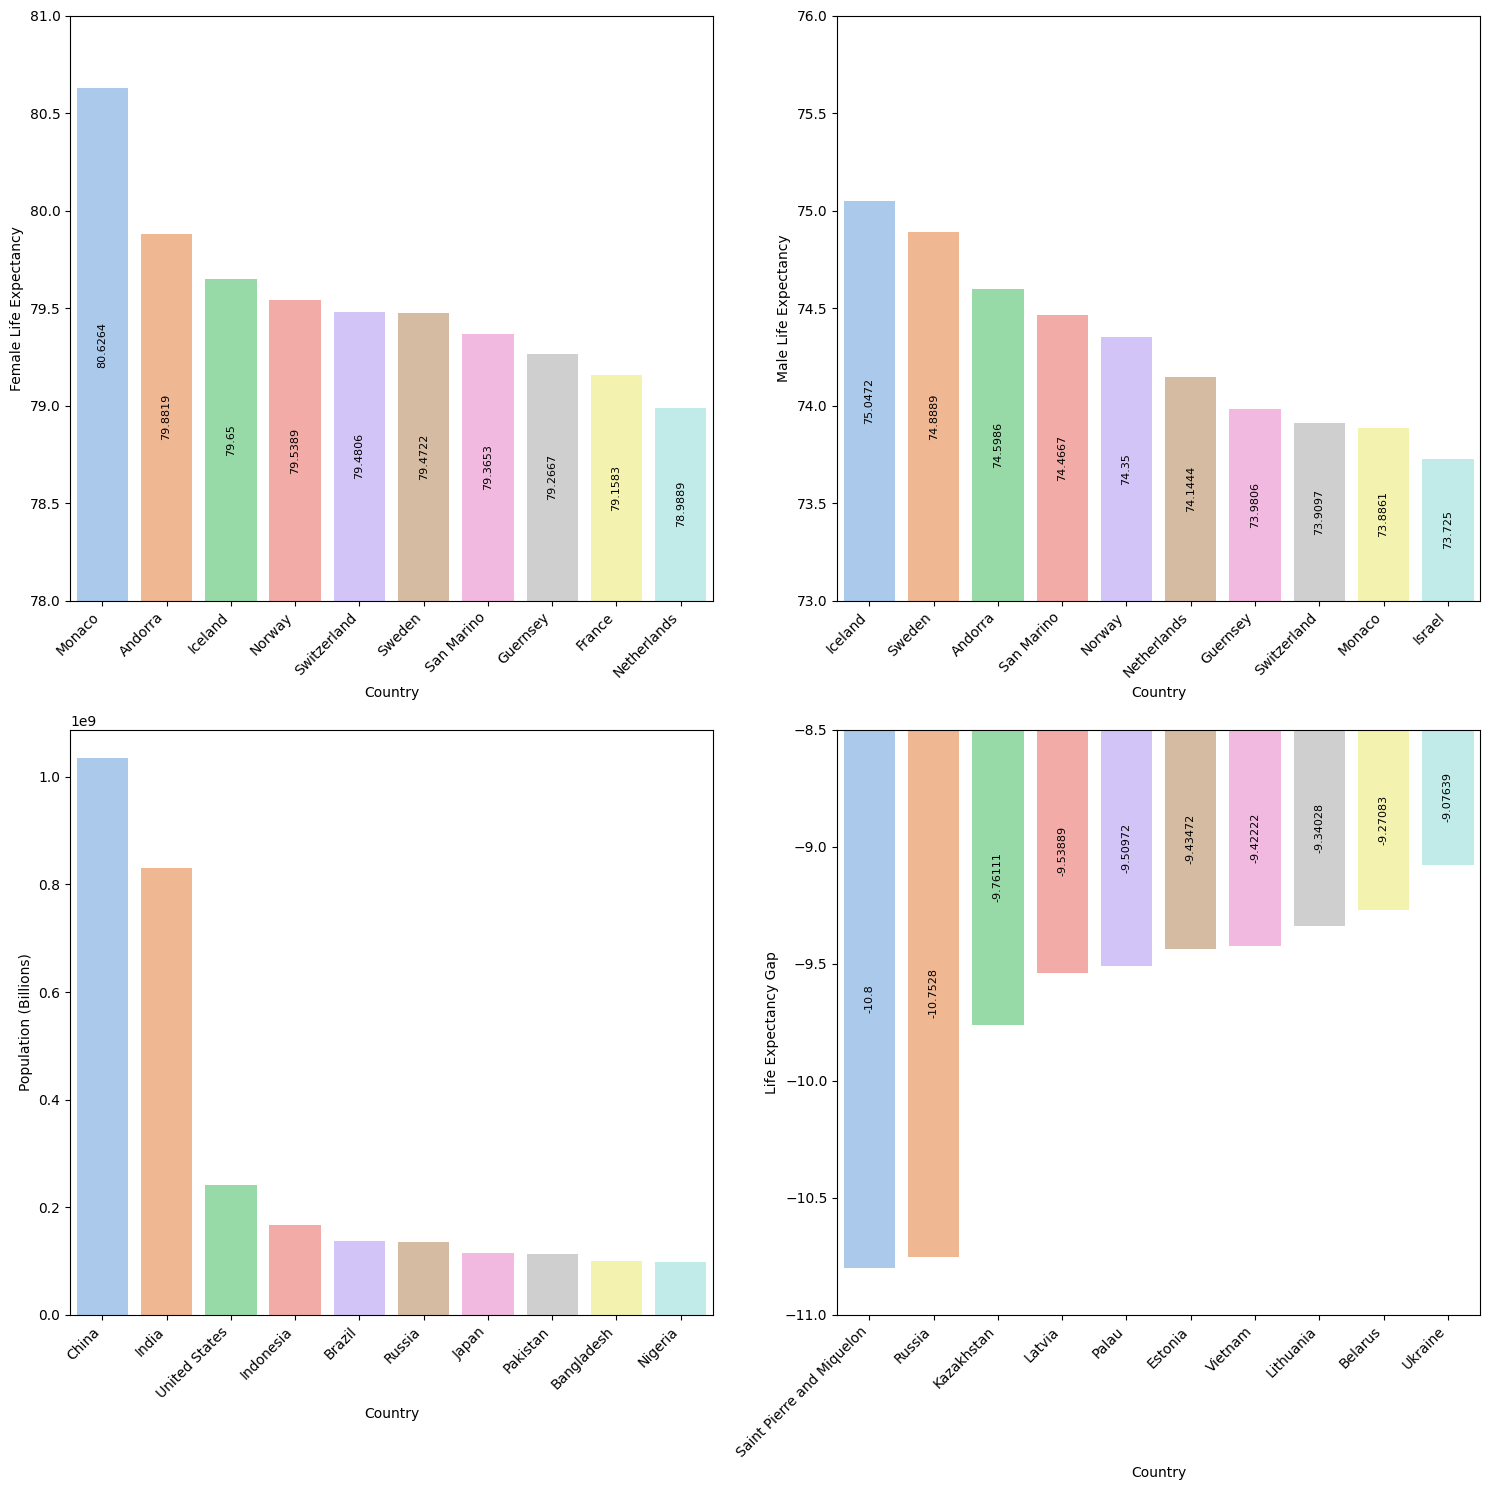

In [49]:
grouped = df.groupby("Country")
nums = ["Female Life Expectancy", "Male Life Expectancy", "Population", "Life Expectancy Gap"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
index = 0
mp = dict()

colors = sns.color_palette("pastel")

for i in range(2):
    for j in range(2):
        means = grouped[nums[index]].mean()
        means = pd.DataFrame(means)
        asc = False
        if index == 3:
            asc = True
        means = means.sort_values(nums[index], ascending=asc)
        mp[nums[index]] = means.index[:10]
        
        sns.barplot(x=means.index[:10], y=means.iloc[:10, 0], ax=axes[i][j], palette=colors)
        
        axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45, ha='right')
        
        rot = 90
        t = "center"

        if index == 0:
            axes[i][j].set_ylim(78, 81)  

        if index == 1:
            axes[i][j].set_ylim(73, 76)  
        if index == 3:
            axes[i][j].set_ylim(-11, -8.5)

        if index == 2:
             axes[i][j].set(ylabel='Population (Billions)')
        else:
            t = "center"
            for container in axes[i][j].containers:
               axes[i][j].bar_label(container, rotation=rot, label_type=t, fontsize=8)
        index += 1
    
plt.tight_layout()
plt.show()

# Boxplot

Questo codice genera una griglia di subplot contenente boxplot per visualizzare la distribuzione e la variabilità delle variabili specificate rispetto ai diversi gruppi di paesi.

Ecco una spiegazione del grafico generato:

Boxplot:

Ogni subplot rappresenta un boxplot della variabile specificata rispetto ai diversi paesi nel gruppo di paesi corrispondente.
Sull'asse x di ogni boxplot ci sono i nomi dei paesi inclusi nel gruppo.
Sull'asse y di ogni boxplot ci sono i valori della variabile specificata.
Il "box" centrale del boxplot rappresenta il range interquartile (IQR), che contiene il 50% centrale dei dati. 
La linea all'interno del box rappresenta la mediana.
Le "whiskers" (le linee verticali che si estendono oltre il box) rappresentano la variazione dei dati al di fuori del range interquartile, escludendo i valori anomali. La lunghezza delle whiskers è di solito 1.5 volte l'IQR.

I cerchi o asterischi sono punti che cadono al di fuori del range delle whiskers e sono considerati valori anomali.

In sintesi, il grafico generato fornisce una rappresentazione visiva della distribuzione e della variabilità dei valori della variabile specificata rispetto ai diversi paesi, consentendo di identificare eventuali tendenze o differenze nei dati tra i vari gruppi di paesi.

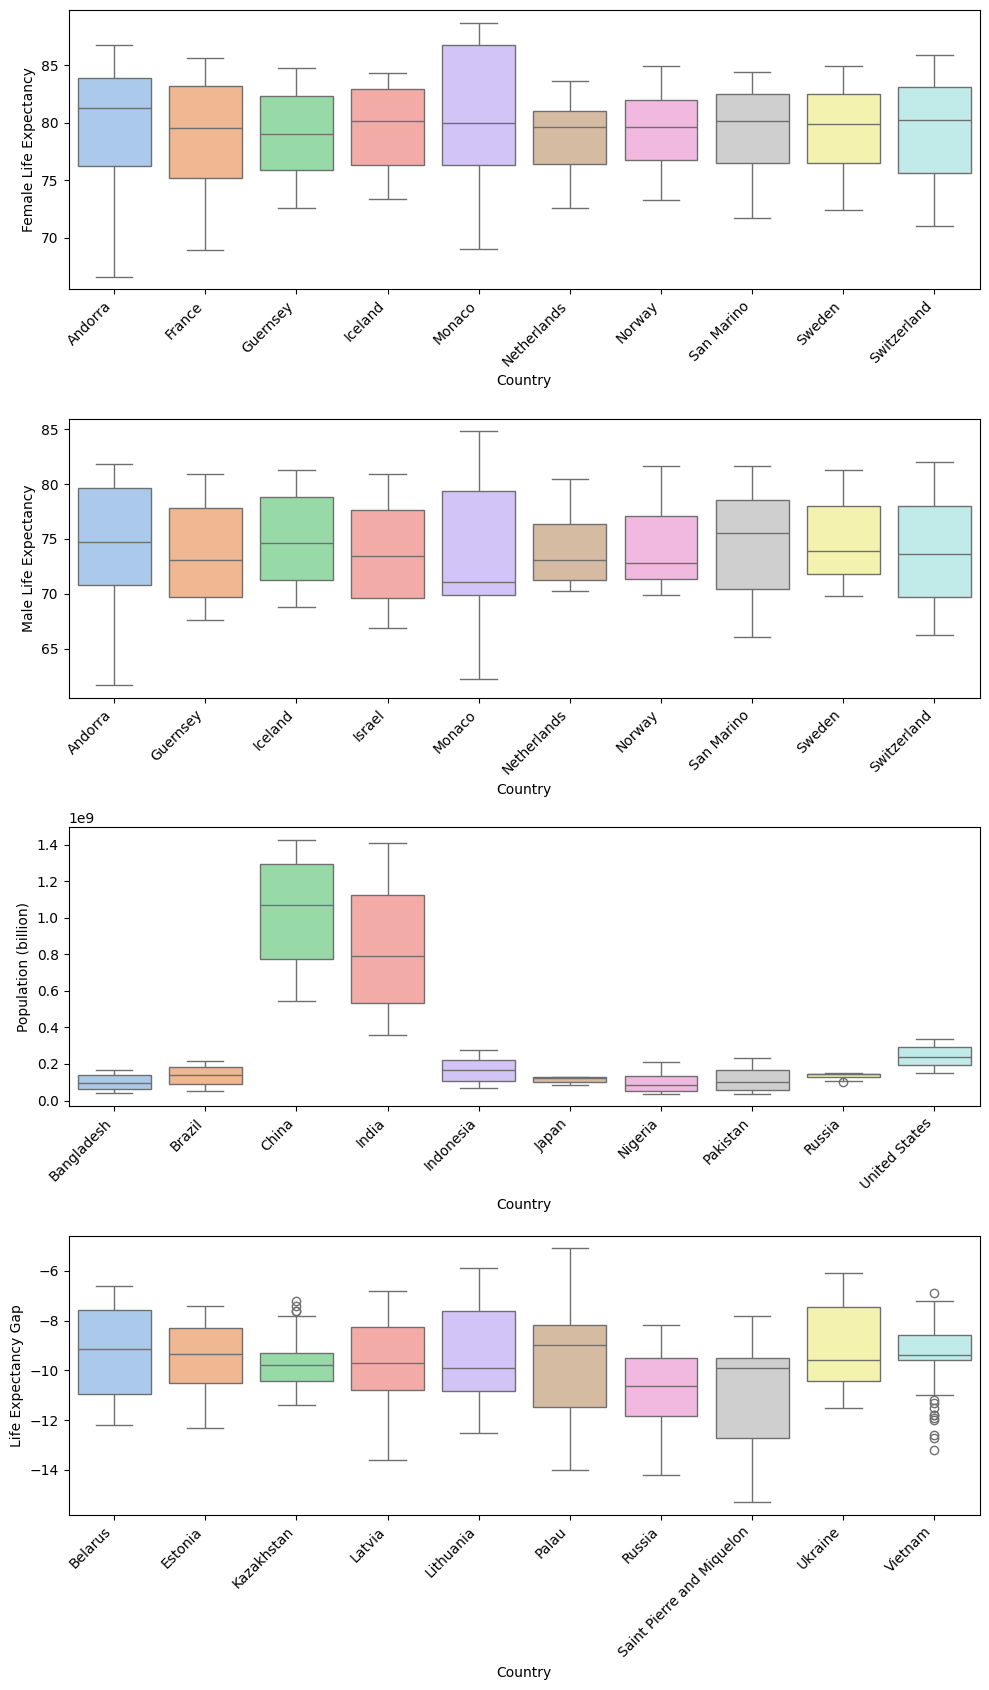

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 17))
index = 0
for i, j in mp.items():
    ds = df[df["Country"].isin(j)]
    sns.boxplot(data=ds, x="Country", y=i, ax=axes[index], palette="pastel")
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=45, ha='right')
    if i == "Population":
        axes[index].set_ylabel("Population (billion)")
    
    index += 1
    
plt.tight_layout()
plt.show()

# Speranza di vita (istogramma)

Questo codice genera un grafico a istogramma che mostra la distribuzione della speranza di vita sia per le donne che per gli uomini all'interno del DataFrame.

Sono rappresentate due distribuzioni di frequenza:
La distribuzione della speranza di vita delle donne è rappresentata dall'istogramma viola, con una linea KDE (Kernel Density Estimation) sovrapposta per mostrare la stima della densità della distribuzione.
La distribuzione della speranza di vita degli uomini è rappresentata dall'istogramma blu, anch'esso con una linea KDE sovrapposta.
L'asse x rappresenta la speranza di vita, mentre l'asse y rappresenta la frequenza, ovvero il numero di occorrenze di determinati valori di speranza di vita all'interno del DataFrame.

In conclusione, il grafico fornisce una visualizzazione delle distribuzioni della speranza di vita per entrambi i sessi all'interno del DataFrame, consentendo di confrontare le distribuzioni e comprendere meglio la variabilità della speranza di vita tra uomini e donne.

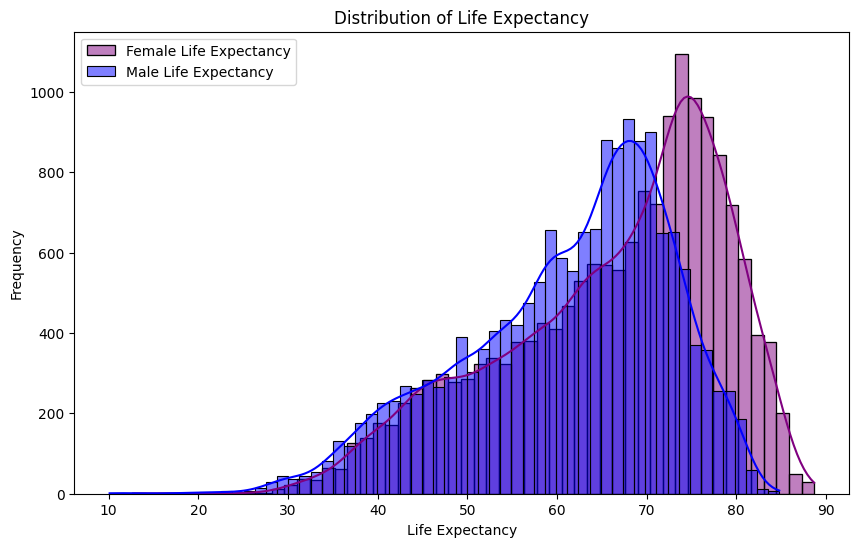

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Female Life Expectancy', kde=True, color='purple', label='Female Life Expectancy')
sns.histplot(data=df, x='Male Life Expectancy',  kde=True, color='blue', label='Male Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.legend()
plt.show()

# Speranza di vita in Italia (1950-2021)

Questo codice genera un grafico a linee che mostra l'andamento della speranza di vita media nel tempo per entrambi i sessi in Italia.

Sono rappresentate due serie di dati:
La speranza di vita media delle donne è rappresentata da una linea di colore blu.
La speranza di vita media degli uomini è rappresentata da un'altra linea di colore arancione.

L'asse x rappresenta l'anno, mentre l'asse y rappresenta la speranza di vita media.

In conclusione, il grafico fornisce una visualizzazione chiara dell'andamento della speranza di vita media nel tempo per entrambi i sessi in Italia, consentendo di identificare tendenze e confrontare i cambiamenti nella speranza di vita tra donne e uomini nel corso degli anni.

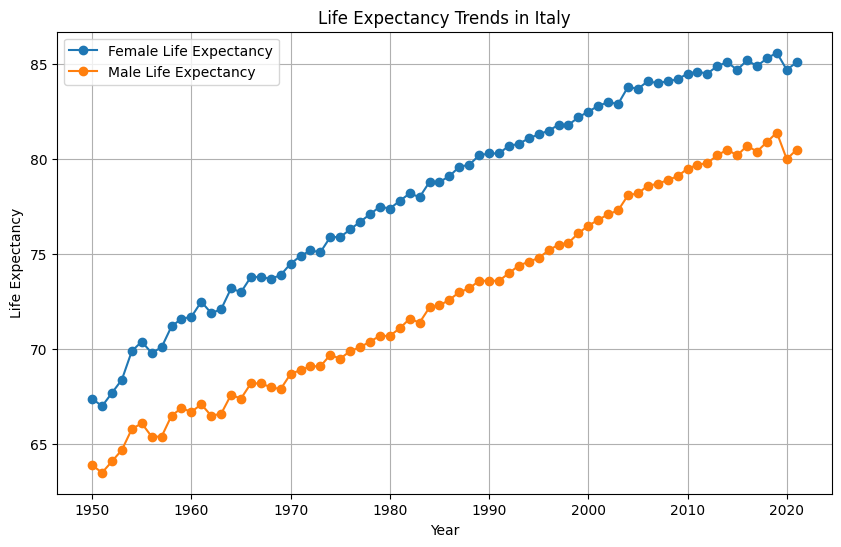

In [52]:
df_italy = df[df['Country'] == 'Italy']

plt.figure(figsize=(10, 6))
plt.plot(df_italy['Year'], df_italy['Female Life Expectancy'], marker='o', label='Female Life Expectancy')
plt.plot(df_italy['Year'], df_italy['Male Life Expectancy'], marker='o', label='Male Life Expectancy')
plt.title('Life Expectancy Trends in Italy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

# Gap nell'aspettativa di vita in Italia 

Questo codice genera un grafico a linee che mostra l'andamento della differenza di speranza di vita tra uomini e donne nel corso del tempo in Italia.

È rappresentata una singola serie di dati che mostra l'andamento della differenza di speranza di vita tra uomini e donne nel tempo.

L'asse x rappresenta l'anno, mentre l'asse y rappresenta il gap tra uomini e donne.

Se si osserva il grafico si può notare come l'aspettativa di vita degli uomini rispetto alle donne aumenti sensibilmente durante gli anni 50-80. Questo può essere attribuita a diversi fattori, tra cui:

Stili di vita: Gli uomini tendevano ad avere stili di vita più rischiosi, come fumo di sigarette e consumo eccessivo di alcol.

Occupazioni: Gli uomini spesso lavoravano in settori più pericolosi, come l'industria pesante e la costruzione, che comportavano un maggior rischio di incidenti sul lavoro ed esposizione a sostanze nocive, influenzando negativamente la loro salute a lungo termine.

Accesso alle cure mediche: Nelle società in cui le donne tradizionalmente si occupavano principalmente della cura della famiglia, potevano avere maggiore accesso alle cure mediche preventive e ai controlli regolari rispetto agli uomini, che potrebbero essere stati meno propensi a cercare assistenza medica per problemi di salute.

Biologia: Ci sono anche differenze biologiche che possono influenzare l'aspettativa di vita tra uomini e donne, ad esempio, gli uomini tendono ad avere una maggiore incidenza di malattie cardiovascolari in età più giovane rispetto alle donne.

Negli ultimi decenni, tuttavia, ci sono stati cambiamenti significativi nei modelli di salute e comportamento, con un aumento dell'attenzione alla salute e al benessere tra entrambi i sessi. Questo ha contribuito a una riduzione del divario nell'aspettativa di vita tra uomini e donne in molti paesi industrializzati. Come si evince dal grafico, tra gli anni 80 e 90 la situazione si è stabilizzata per poi avere un incremento costante fino ad oggi nella diminuzione del divario tra le aspettative di vita dei due sessi.

Infine curioso notare come tra  il 2019 e il 2020 l'aspettativa di vita sia calata notevolemte, la causa è sicuramente da attribuire al covid-19 che, dati alla mano, colpì maggiormente l'uomo rispetto alla donna. 

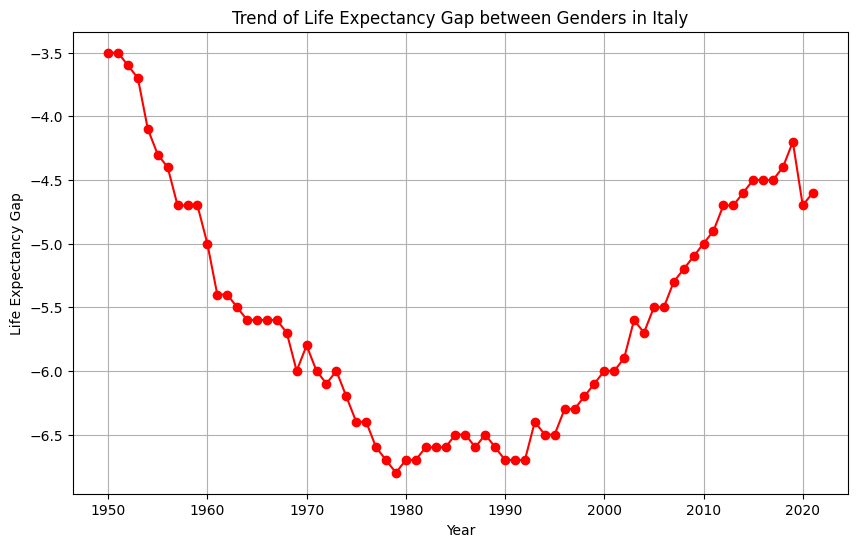

In [53]:
# Grafico a linee per mostrare l'andamento della differenza di speranza di vita tra uomini e donne nel tempo
plt.figure(figsize=(10, 6))
plt.plot(df_italy['Year'], df_italy['Life Expectancy Gap'], marker='o', color='red')
plt.title('Trend of Life Expectancy Gap between Genders in Italy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Gap')
plt.grid(True)
plt.show()

# Andamento della popolazione Italiana

Questo codice genera un grafico a linee che mostra l'andamento della popolazione nel corso del tempo in Italia.

È rappresentata una singola serie di dati che mostra l'andamento della popolazione nel tempo.
L'asse x rappresenta l'anno, mentre l'asse y rappresenta i cittadini italiani.

La popolazione italiana è cresciuta demograficamente negli ultimi 70 anni principalmente a causa di diversi fattori. Durante il dopoguerra, si è verificato un periodo di ripresa economica e miglioramento delle condizioni di vita, che ha portato a una diminuzione della mortalità infantile e all'aumento dell'aspettativa di vita. L'immigrazione ha anche contribuito alla crescita demografica, con flussi migratori provenienti da altre nazioni europee e, più recentemente, da paesi extraeuropei. Inoltre, politiche di sostegno alla famiglia e incentivi alla natalità hanno influenzato positivamente il tasso di nascite.

La lieve flessione della popolazione italiana dopo il 2015 può essere attribuita a diversi fattori. Uno di essi è il rallentamento dell'immigrazione a seguito della crisi economica globale e delle politiche restrittive sull'immigrazione adottate da alcuni paesi europei, incluso l'Italia. Inoltre, cambiamenti nei modelli familiari e nelle scelte di vita, come un'età media del matrimonio più avanzata e una riduzione del numero medio di figli per donna, hanno contribuito a una diminuzione del tasso di natalità. Infine, l'invecchiamento della popolazione, con un aumento della proporzione di anziani rispetto ai giovani, ha influito sulla dinamica demografica complessiva.

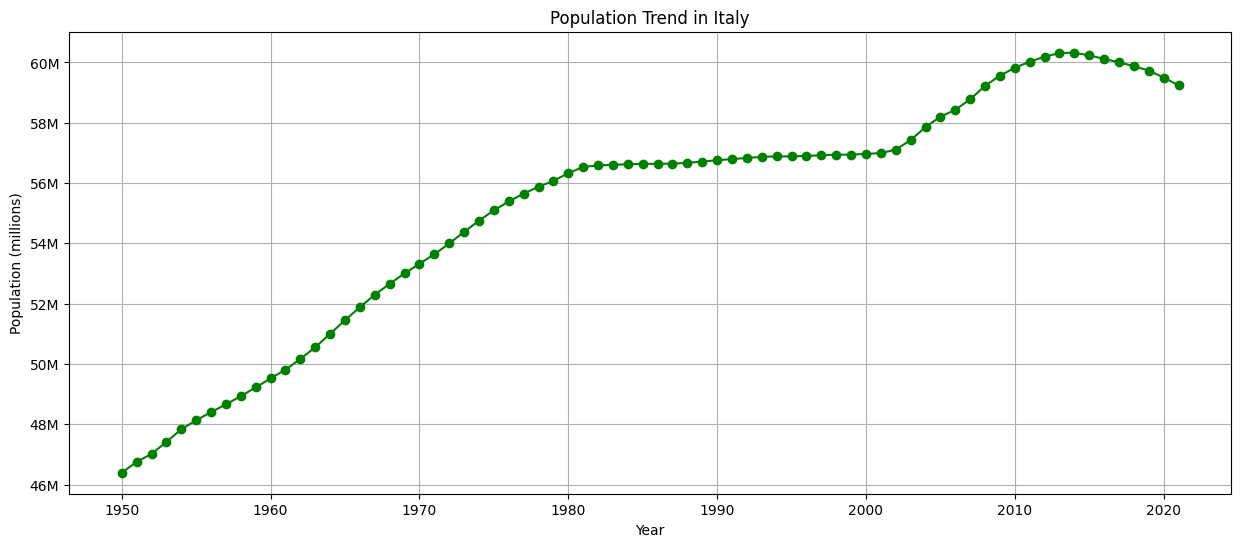

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(df_italy['Year'], df_italy['Population'], marker='o', color='green')
plt.title('Population Trend in Italy')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
 
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x * 1e-6)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
 

plt.grid(True)
plt.show()

# La Heatmap

Questo codice genera la heatmap delle correlazioni tra le variabili selezionate nel DataFrame, che includono l'anno, la speranza di vita media femminile, la speranza di vita media maschile e la popolazione.

L'heatmap mostra le correlazioni tra le variabili selezionate. Ogni casella della griglia rappresenta la correlazione tra due variabili, dove il colore indica la forza e la direzione della correlazione.
Il valore numerico della correlazione è annotato all'interno di ogni casella della griglia.

La scala di colore utilizzata è definita in modo tale da andare dal blu (indicativo di correlazioni negative) al rosso (indicativo di correlazioni positive), passando per i toni del viola, bianco e giallo per le correlazioni nulle.

In conclusione, l'heatmap fornisce una rappresentazione visiva delle correlazioni tra le variabili selezionate nel DataFrame, consentendo di identificare rapidamente le relazioni tra di esse.

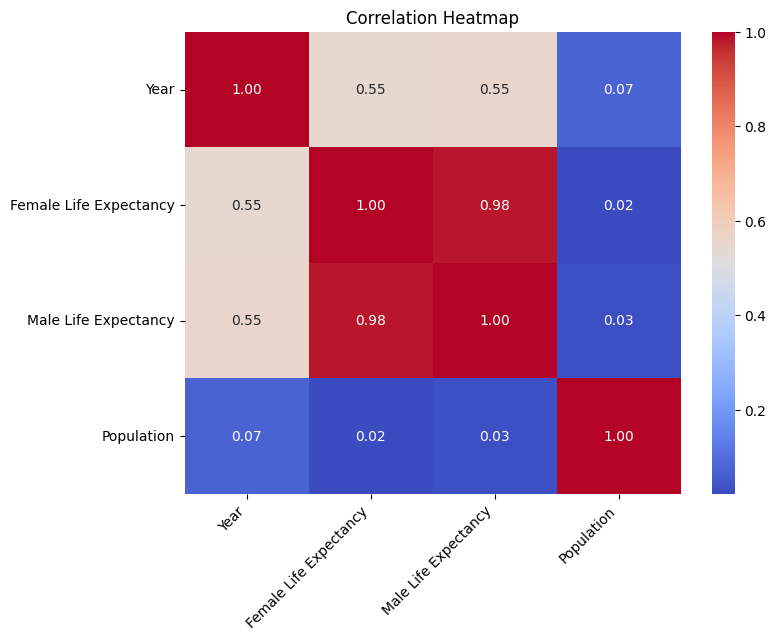

In [55]:
correlation_matrix = df[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population']].corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.show()


# Bibliografia

Infine riportiamo il link di Kaggle dal quale abbiamo preso tutte le informazioni necessarie per la realizzazione del progetto.

https://www.kaggle.com/datasets/saimondahal/life-expectancy-trends-for-males-and-females/data

# Progetto realizzato da Stefano Tassinari e Michele Mantini